## Chapter 3: A Tour of Machine Learning Classifiers Using Scikit-learn
This notebook will show how the scikit-learn library can be used to implement popular and powerful machine learning algorithms that are commonly used in academia as well as in the industry. sklearn will be used to implement the following classification algorithms: perceptron, logistic regression, support vector machine (SVM), kernel SVM, decision tree, random forest, and k-nearest neighbors (KNN).

## Training a perceptron via scikit-learn

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, tol=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
Accuracy: 0.98


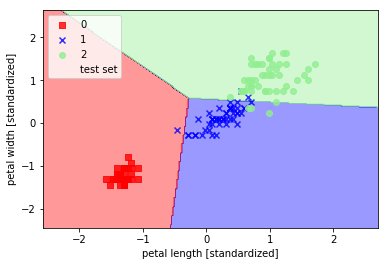

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0, linewidth=1, marker='o',s=55, label='test set') 
        

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure()
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()   

## Logistic regression intuition and conditional probabilities

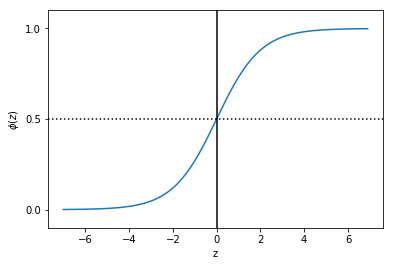

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

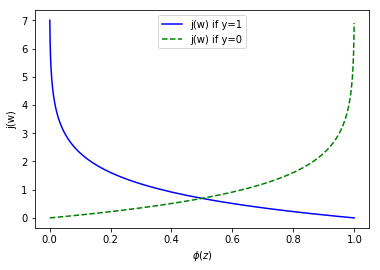

In [6]:
plt.figure()
plt.plot(phi_z, -np.log(phi_z),c='b', label='j(w) if y=1')
plt.plot(phi_z, -np.log(1-phi_z),c='g', linestyle='--',label='j(w) if y=0')
plt.xlabel('$\phi(z)$')
plt.ylabel('j(w)')
plt.legend()
plt.show()

## Training a logistic regression model with scikit-learn

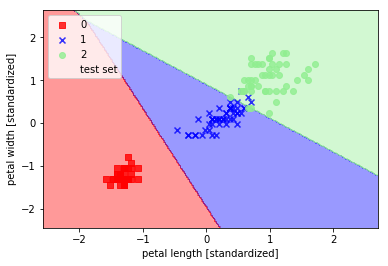

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()  

In [8]:
prob=lr.predict_proba(X_test_std[0:3,:])
np.round(prob,2)

array([[0.  , 0.06, 0.94],
       [0.  , 1.  , 0.  ],
       [0.82, 0.18, 0.  ]])

In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


## Tackling overfitting via regularization

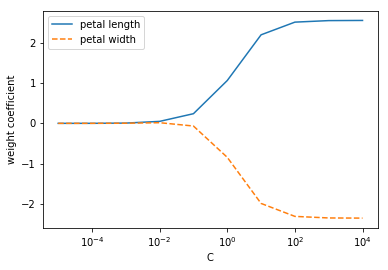

In [10]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0],label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Maximum margin classification with support vector machines

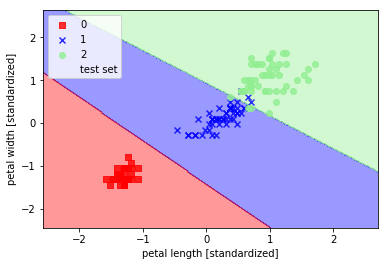

In [11]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Alternative implementations in scikit-learn

In [12]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Solving nonlinear problems using a kernel SVM

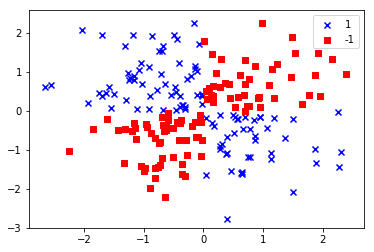

In [13]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

## Using the kernel trick to find separating hyperplanes in higher dimensional space

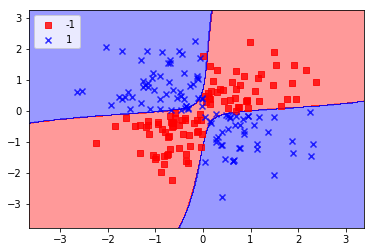

In [14]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

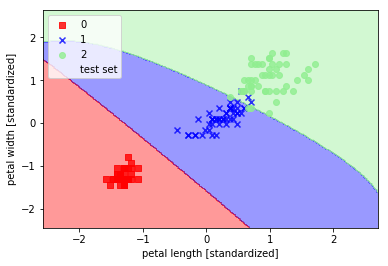

In [15]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

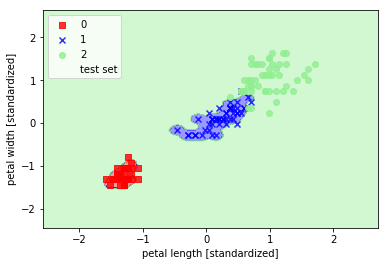

In [16]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Decision tree learning

## Maximizing information gain – getting the most bang for the buck

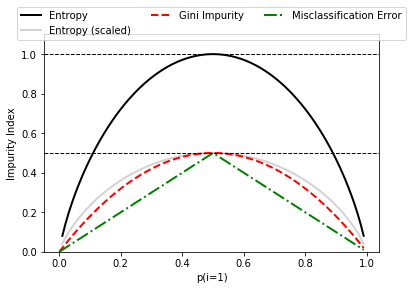

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray','red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## Building a decision tree

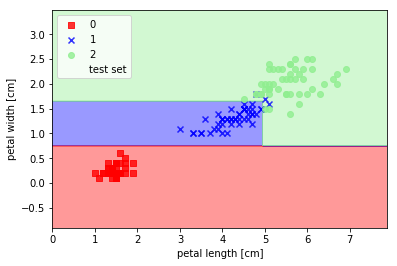

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',feature_names=['petal length', 'petal width'])


## View decision tree
After we have installed GraphViz on our computer, we can convert the tree.dot file into a PNG file
by executing the following command from the command line in the location where we saved the tree.dot file:
dot -Tpng tree.dot -o tree.png

To install graphviz, use the following:
conda install -c anaconda graphviz or pip install graphviz

## Combining weak to strong learners via random forests

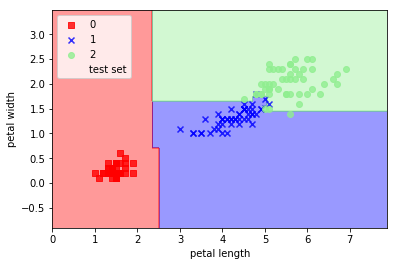

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## K-nearest neighbors – a lazy learning algorithm

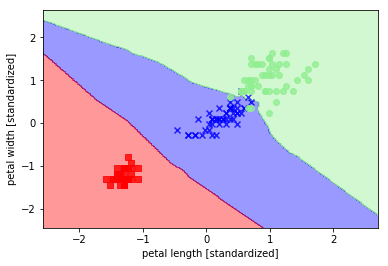

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

## My addition: implementation of logistic regression using log-likelihood cost function

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


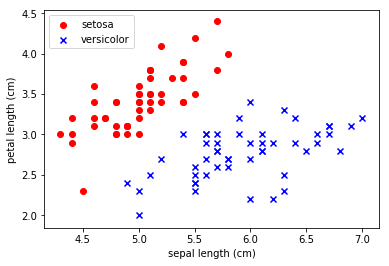

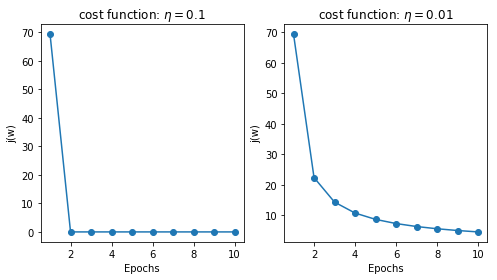

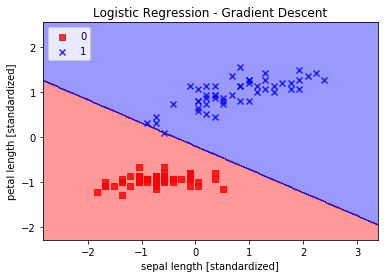

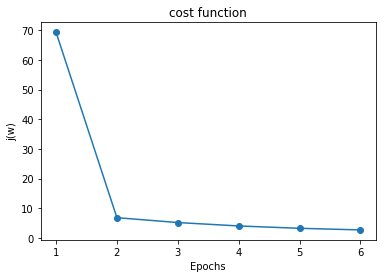

Number of misclassifications: 0


In [22]:
"""
This code applies the Logistic Regression classification algorithm to the iris data set.
The weights used for computing the activation function are optimized by minimizing the log-likelihood cost function
using the gradient-descent method. 
For more information about the logistic regression classifier and the log-likelihood cost function, see the following
book: "Python Machine Learning" by Sebastian Raschka (Chapter 3).
  
This code is a modification of the Adaptive Linear Neuron (Adaline) code provided in the above-mentioned book.
Created on Jul 28, 2018
 
@author: Benjamin Tayo
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#define logistic function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

#define logistic Regression gradient-descent class 
class lrGD(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
           output = self.net_input(X)
           errors = (y - output)
           self.w_[1:] += self.eta * X.T.dot(errors)
           self.w_[0] += self.eta * errors.sum()
           cost = -np.dot(y, np.log(output)) - np.dot(1-y, np.log(1 - output))
           self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return sigmoid(np.dot(X, self.w_[1:]) + self.w_[0])
    
    def activation(self, X):
        """Compute logistic activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.5, 1, 0)   


#import the iris dataset
df = pd.read_csv('iris.data.csv', header=None)
print(df.tail())
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, 0:4].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

#standardize the features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
X_std[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()

#plot cost function for different learning rates
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = lrGD(n_iter=10, eta=0.1).fit(X_std, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('j(w)')
ax[0].set_title('cost function: $\eta =0.1$')
ada2 = lrGD(n_iter=10, eta=0.01).fit(X_std, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('j(w)')
ax[1].set_title('cost function: $\eta=0.01$')
plt.show()


#function to plot decision boundary

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

#plot decision boundary       
ada = lrGD(n_iter=6, eta=0.1)
ada.fit(X_std[:,[0,2]], y)
plot_decision_regions(X_std[:,[0,2]], y, classifier=ada)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('j(w)')
plt.title('cost function')
plt.show()

#use lrGD model to predict class labels
ada = lrGD(n_iter=6, eta=0.1)
ada.fit(X_std, y)
print('Number of misclassifications: %d' % (X_std.shape[0] -np.where(ada.predict(X_std)==y,1,0).sum()))